In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from numpy import floor
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings                                            
warnings.simplefilter(action='ignore') 

C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# read data
data = pd.read_excel("C:\\Users\\Manish\\Downloads\\DS3_C6_S4_TimeSeries_Sales_Data_Project.xls",index_col='Order Date',parse_dates=True)
data

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-21,9990,CA-2014-110422,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2017-02-26,9991,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
2017-02-26,9992,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [3]:
df=data.copy()

## Data Preperation and EDA

In [4]:
df_1=data.copy()

In [5]:
df_1.shape

(9994, 20)

### Univariate Analysis

In [6]:
y=df_1["Sales"].resample('MS').mean()     #MS mean Month Start

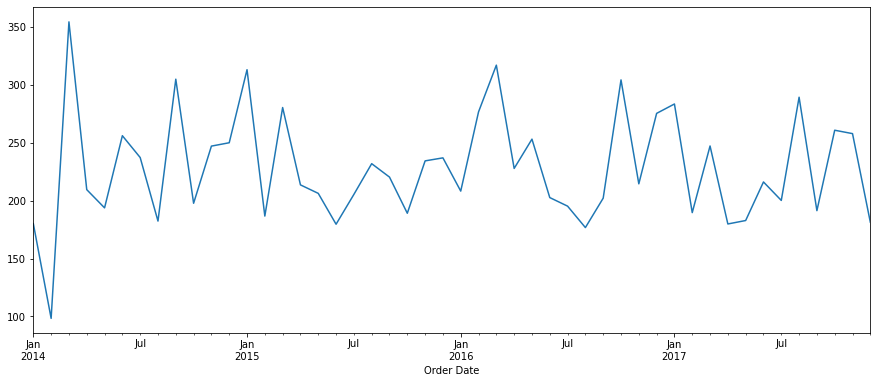

In [7]:
#visually checking the time series trend
y.plot(figsize=(15,6))
plt.show()

### Bivariate Analysis

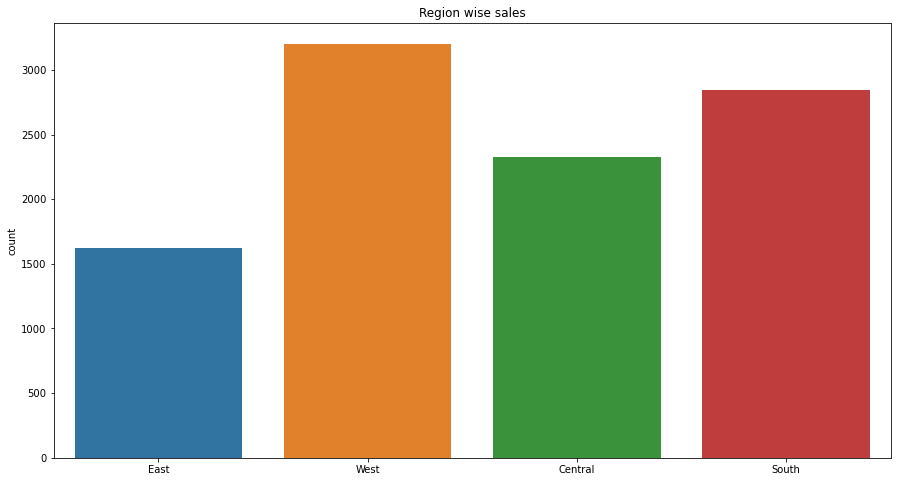

In [8]:
# plotting g plot for bivariate analysis

fig, ax=plt.subplots(figsize=(15,8))
sns.countplot(x=df_1['Region'].values,data=df_1)
labels=[item.get_text() for item in ax.get_xticklabels()]
labels[0]='East'
labels[1]='West'
labels[2]='Central'
labels[3]='South'
ax.set_xticklabels(labels)
ax.set_title("Region wise sales")
plt.show()

In [9]:
df1=df[['Sales']]
print(df1)

               Sales
Order Date          
2016-11-08  261.9600
2016-11-08  731.9400
2016-06-12   14.6200
2015-10-11  957.5775
2015-10-11   22.3680
...              ...
2014-01-21   25.2480
2017-02-26   91.9600
2017-02-26  258.5760
2017-02-26   29.6000
2017-05-04  243.1600

[9994 rows x 1 columns]


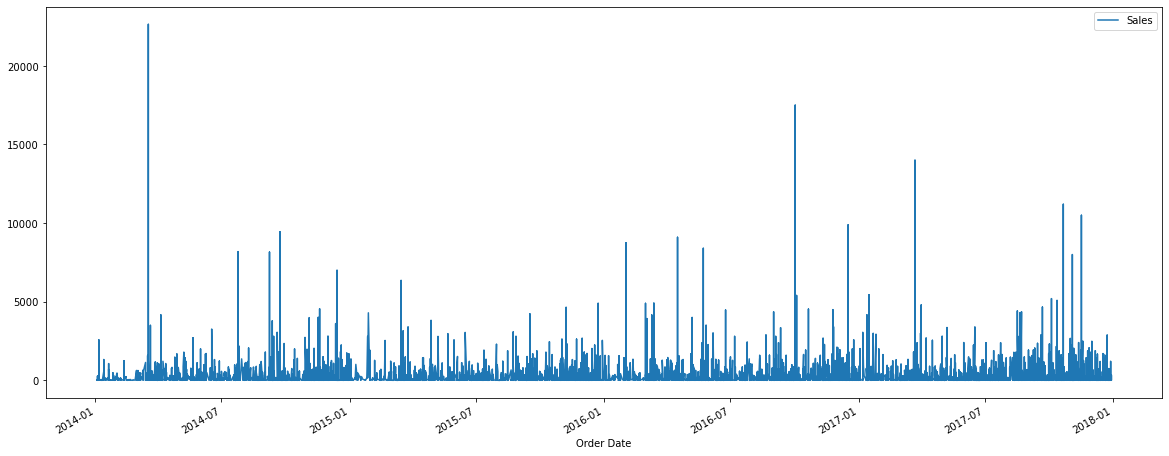

In [12]:
df1.plot(figsize=(20,8))
plt.show()

In [13]:
new_df=data.resample('7D').mean()

In [14]:
print(new_df)

                 Row ID   Postal Code       Sales  Quantity  Discount  \
Order Date                                                              
2014-01-03  5184.944444  55900.777778  269.935889  3.222222  0.188889   
2014-01-10  2780.700000  47170.750000  206.521950  3.750000  0.152500   
2014-01-17  5289.720000  65833.760000  127.543840  3.920000  0.120000   
2014-01-24  4108.266667  43608.866667  117.889867  3.400000  0.026667   
2014-01-31  3826.928571  64938.142857  109.515714  3.285714  0.189286   
...                 ...           ...         ...       ...       ...   
2017-12-01  5213.081481  55038.555556  175.601259  4.051852  0.171852   
2017-12-08  4748.446154  53919.869231  186.843115  3.584615  0.127308   
2017-12-15  4587.388889  59905.111111  156.303625  3.611111  0.092361   
2017-12-22  4936.858491  54384.726415  197.644894  3.641509  0.187925   
2017-12-29  4007.947368  56652.421053  191.017053  3.368421  0.073684   

               Profit  
Order Date             
20

In [15]:
df_sales=new_df[['Sales']]
print(df_sales)

                 Sales
Order Date            
2014-01-03  269.935889
2014-01-10  206.521950
2014-01-17  127.543840
2014-01-24  117.889867
2014-01-31  109.515714
...                ...
2017-12-01  175.601259
2017-12-08  186.843115
2017-12-15  156.303625
2017-12-22  197.644894
2017-12-29  191.017053

[209 rows x 1 columns]


### Splitting data into 70:30 ratio

In [16]:
ss=int(np.round(len(new_df)* 0.7,0))
print('actual length={},sample size={}'.format(len(df_sales),ss))
train=new_df[:ss]
test=new_df[ss:]
print('train={},test={}'.format(len(train),len(test)))

actual length=209,sample size=146
train=146,test=63


### Decomposition

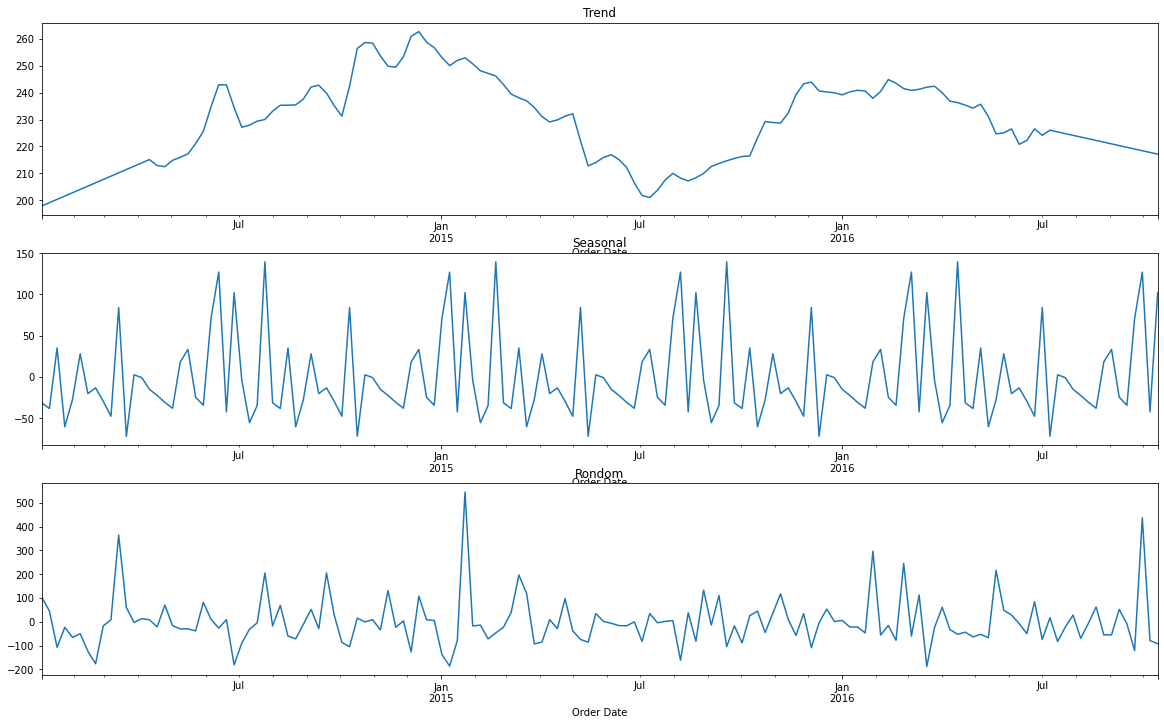

In [17]:
# seasonal_decompose
fig,ax=plt.subplots(3,1,figsize=(20,12))

result=seasonal_decompose(train['Sales'],period=30,extrapolate_trend='freq')
result.trend.plot(ax=ax[0])
ax[0].set_title("Trend")

result.seasonal.plot(ax=ax[1])
ax[1].set_title("Seasonal")

result.resid.plot(ax=ax[2])
ax[2].set_title("Rondom")
plt.show()

### Check for stationarity

In [18]:
# dickey-fulller test for stationarity

def checkStationarity(data):
    pvalue=adfuller(data)[1]
    if(pvalue>0.5):
        msg='p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
    return(msg)

In [19]:
new_train=train[['Sales']]

In [20]:
checkStationarity(new_train)

'p-value=1.1276341107106658e-12. Data is stationary'

## Plot ACF and PACF

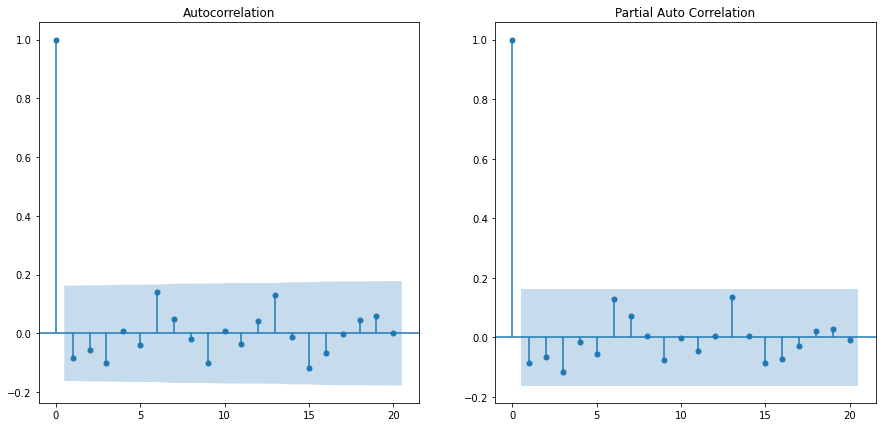

In [21]:
ROWS=1;COLS=2
fig,ax=plt.subplots(ROWS,COLS,figsize=(15,7))
plot_acf(train['Sales'],lags=20,ax=ax[0]);
plt.title('Auto Correlation')

plot_pacf(train['Sales'],lags=20,ax=ax[1]);
plt.title("Partial Auto Correlation")
plt.show()

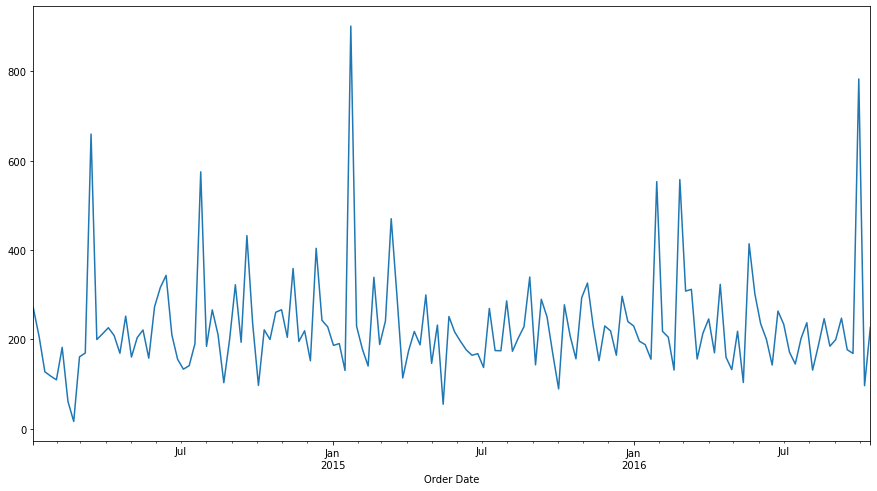

In [22]:
train['Sales'].plot(figsize=(15,8))
plt.show()

In [23]:
p=[1,2,3,4]
q=[1,2,3,4]
d=0
for i in p:
    for j in q:
        m1=ARIMA(train['Sales'],order=(i,d,j)).fit()
        print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  146
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -903.664
Date:                Mon, 23 May 2022   AIC                           1815.328
Time:                        19:18:32   BIC                           1827.262
Sample:                    01-03-2014   HQIC                          1820.177
                         - 10-14-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        228.7663     11.908     19.210      0.000     205.426     252.106
ar.L1          0.5186      0.518      1.001      0.317      -0.497       1.534
ma.L1         -0.6317      0.428     -1.477      0.1

### By comparing the above models we found that, the best model is with value(1,0,1)with least AIC,BIC and L-JUNG BOX value
so, further we will use p=1, d=0 and q=1

# ARIMA Model

In [24]:
p=1; d=0; q=1
m2=ARIMA(df1['Sales'],order=(p,d,q)).fit()
print(m2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 9994
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -78490.906
Date:                Mon, 23 May 2022   AIC                         156989.811
Time:                        19:18:52   BIC                         157018.650
Sample:                             0   HQIC                        156999.573
                               - 9994                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        229.8580      9.378     24.511      0.000     211.478     248.238
ar.L1         -0.1338      2.010     -0.067      0.947      -4.073       3.806
ma.L1          0.1409      2.008      0.070      0.9

In [25]:
# using the model to predict values
#prediction

prediction=m2.predict(0,len(test-1))
prediction

Order Date
2016-11-08    229.858001
2016-11-08    230.084867
2016-06-12    233.377812
2015-10-11    227.839534
2015-10-11    235.290387
                 ...    
2016-06-17    228.220703
2016-06-17    228.674802
2016-06-17    228.741566
2015-11-24    228.401087
2015-11-24    228.536063
Name: predicted_mean, Length: 64, dtype: float64

In [26]:
#Collate actual, predicted and errors together
actual=[]
pred=[]

for i in range(len(prediction)):
    actual.append(df1['Sales'][i])
    pred.append(prediction[i])

df_res1=pd.DataFrame({'actual':actual,'predicted':pred})
df_res1['err']=df_res1.actual-df_res1.predicted
print(df_res1)

      actual   predicted         err
0   261.9600  229.858001   32.101999
1   731.9400  230.084867  501.855133
2    14.6200  233.377812 -218.757812
3   957.5775  227.839534  729.737966
4    22.3680  235.290387 -212.922387
..       ...         ...         ...
59   30.0000  228.220703 -198.220703
60   48.4800  228.674802 -180.194802
61    1.6800  228.741566 -227.061566
62   13.9800  228.401087 -214.421087
63   25.8240  228.536063 -202.712063

[64 rows x 3 columns]


### Calculating error terms

In [27]:
mse=mean_squared_error(df_res1.actual,df_res1.predicted)
print("\n\tMSE={}\n\tRMSE={}".format(mse,np.sqrt(mse)))


	MSE=250648.15542765884
	RMSE=500.64773586590684


### Forecasting future values using the model

In [28]:
fcast=m2.predict(start=len(df_sales),end=len(df_sales)+11, type='levels').rename('Forecast')
print(fcast)

Order Date
2017-12-01    228.416866
2017-12-01    228.804853
2015-02-09    229.031045
2015-01-02    228.495568
2015-01-02    228.591373
2015-01-02    231.611093
2015-01-02    228.430530
2015-01-02    236.837196
2016-10-28    227.882533
2016-10-28    229.168539
2015-12-24    230.468132
2015-12-24    228.185489
Name: Forecast, dtype: float64


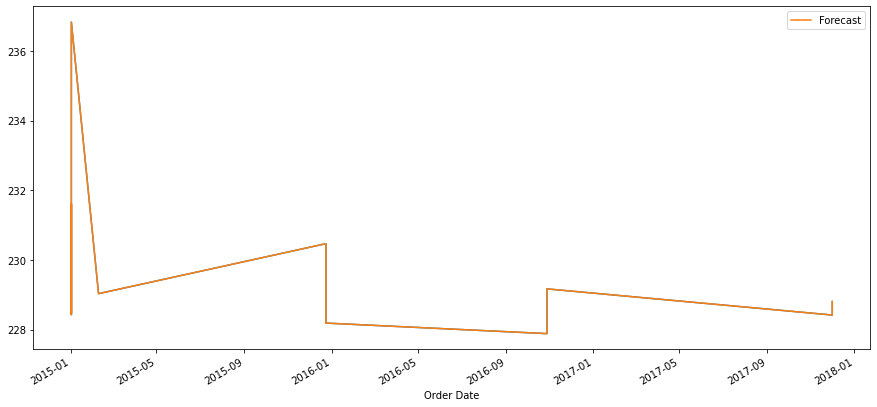

In [29]:
#plotting forecast
fcast.plot(figsize=(15,7))
fcast.plot(legend=True)
plt.show()

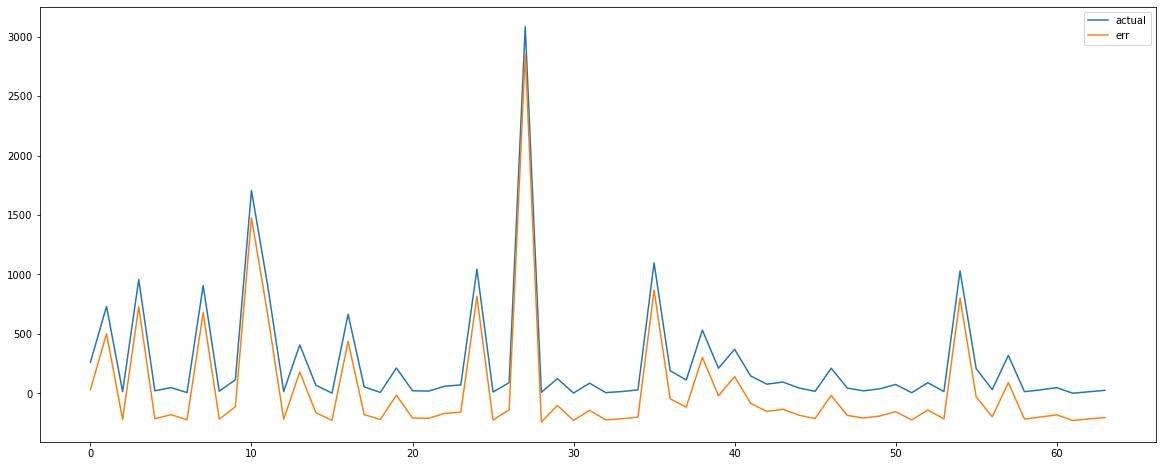

In [30]:
#plotting actual and error values
df_res1[['actual','err']].plot(figsize=(20,8),legend=True)
plt.show()

# SARIMA Model

### split exogenous data into train and test parts

In [31]:
exog_train=train[['Sales','Quantity','Discount','Profit']]
exog_test=test[['Sales','Quantity','Discount','Profit']]

In [32]:
print(exog_train.head())  #exog train data

                 Sales  Quantity  Discount     Profit
Order Date                                           
2014-01-03  269.935889  3.222222  0.188889  68.969633
2014-01-10  206.521950  3.750000  0.152500  35.306630
2014-01-17  127.543840  3.920000  0.120000  13.047980
2014-01-24  117.889867  3.400000  0.026667  11.532373
2014-01-31  109.515714  3.285714  0.189286  26.862571


In [33]:
print(exog_test.head())  #exog test data 

                 Sales  Quantity  Discount     Profit
Order Date                                           
2016-10-21  255.120478  4.239130  0.100000  57.460511
2016-10-28  183.538459  3.967213  0.119672  26.842207
2016-11-04  183.852280  3.631068  0.148738  21.566374
2016-11-11  238.714080  3.600000  0.149333  29.169895
2016-11-18  150.546308  3.750000  0.181731  27.862687


In [34]:
print('exog_train={},train={}'.format(len(exog_train),len(train)))

exog_train=146,train=146


In [35]:
# Sarima MOdel
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train.Sales,order=(1,0,1),seasonal_order=(1,0,0,52),exog=exog_train.values).fit()
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  146
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 52)   Log Likelihood                1527.792
Date:                             Mon, 23 May 2022   AIC                          -3039.585
Time:                                     19:19:59   BIC                          -3015.716
Sample:                                 01-03-2014   HQIC                         -3029.886
                                      - 10-14-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   1.71e-20   5.86e+19      0.000       1.000       1.000
x2         -1.332e-14   2.4

In [36]:
# forecasting 
forecast=model.forecast(len(test),exog=exog_test.values)
print(forecast)

2016-10-21    255.120478
2016-10-28    183.538459
2016-11-04    183.852280
2016-11-11    238.714080
2016-11-18    150.546308
                 ...    
2017-12-01    175.601259
2017-12-08    186.843115
2017-12-15    156.303625
2017-12-22    197.644894
2017-12-29    191.017053
Freq: 7D, Name: predicted_mean, Length: 63, dtype: float64


In [37]:
# calculating error terms

mse=mean_squared_error(test.Sales,forecast)
print("\n\tRMSE={}\n\tMSE={}".format(mse,np.sqrt(mse)))


	RMSE=2.1669382986337684e-27
	MSE=4.655038451649748e-14


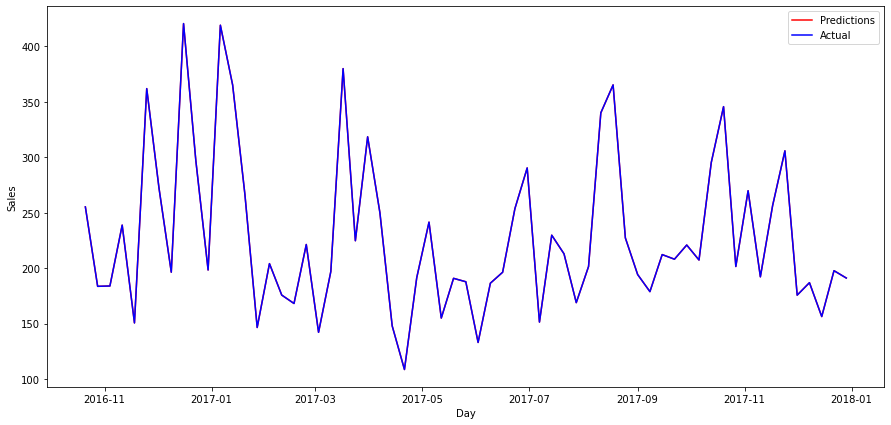

In [38]:
#actual and forecasted values 

plt.figure(figsize=(15,7))
plt.plot(forecast,'r',label='Predictions')
plt.plot(test.Sales,'b',label='Actual')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()
plt.show()

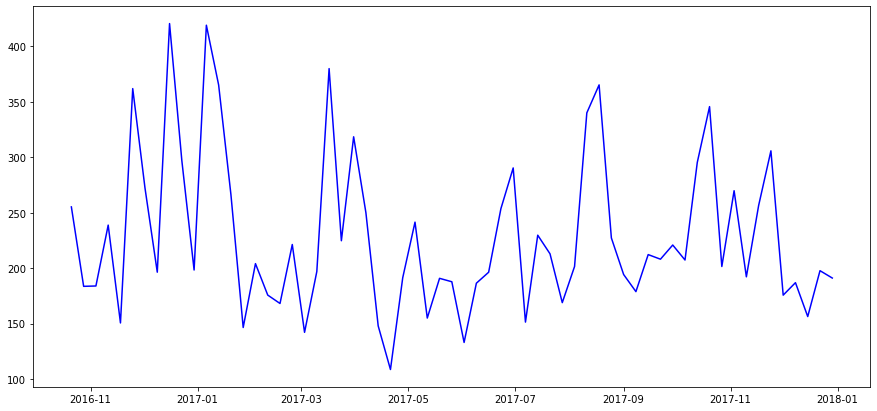

In [39]:
#plotting  sales
plt.figure(figsize=(15,7))
plt.plot(test.Sales,'b',label='Actual')
plt.show()

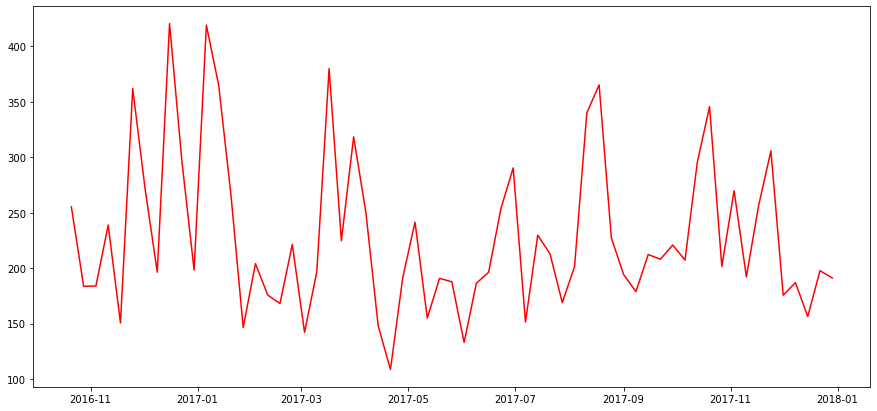

In [40]:
#Plotting Forecast

plt.figure(figsize=(15,7))
plt.plot(forecast,'r',label='Forecast')
plt.show()

# CONCLUSION:

#### For ARIMA Model

AIC      156989.811

BIC      157018.650

MSE      250648.15542765884

RMSE     500.64773586590684

#### For SARIMA Model
RMSE    2.1669382986337684e-27

MSE     4.655038451649748e-14

AIC     -3039.585

BIC     -3015.716

## Performed different models/algorithms, we can see here that for SARIMA model's RMSE/MSE/AIC/BIC scores are least here in comaprison with other models/algorithms.



## So, SARIMA model/algorithm is best here.